In [43]:
#pip install TPOT

In [44]:
from sklearn import preprocessing

In [45]:
import pandas as pd
import numpy as np

In [46]:
from tpot import TPOTRegressor

In [47]:
from sklearn.model_selection import train_test_split

In [76]:
X_traina = np.load('X_train.npy')
y_traina = np.load('y_train.npy')
X_testa = np.load('X_test.npy')
y_testa = np.load('y_test.npy')

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_traina, y_traina, test_size=0.25, random_state=0)

In [50]:
# Create a tpot object with a few parameters
# This is just a prove, we have to modify the generation and the population size later 
tpot = TPOTRegressor(scoring = 'neg_mean_absolute_error',
                    periodic_checkpoint_folder="tpot_mnst1.txt",
                    random_state=40,
                    max_time_mins = 480, 
                    n_jobs = -1,
                    verbosity = 2,
                    generations=20,
                    population_size=100,
                    cv = 5)

In [51]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.10706350379252258

Generation 2 - Current best internal CV score: -0.10706350379252258

Generation 3 - Current best internal CV score: -0.10706350379252258

Generation 4 - Current best internal CV score: -0.10706350379252258

Generation 5 - Current best internal CV score: -0.10706350379252258

Generation 6 - Current best internal CV score: -0.10706222353937196

Generation 7 - Current best internal CV score: -0.10672805276985708

Generation 8 - Current best internal CV score: -0.10672805276985708

Generation 9 - Current best internal CV score: -0.10672805276985708

Generation 10 - Current best internal CV score: -0.10672805276985708

Generation 11 - Current best internal CV score: -0.10672805276985708

Generation 12 - Current best internal CV score: -0.10672805276985708

Generation 13 - Current best internal CV score: -0.10672805276985708

Generation 14 - Current best internal CV score: -0.10672680253157281

Generation 15 - Current best

TPOTRegressor(generations=20, max_time_mins=480, n_jobs=-1,
              periodic_checkpoint_folder='tpot_mnst1.txt', random_state=40,
              scoring='neg_mean_absolute_error', verbosity=2)

In [52]:
# Show the final model
print(tpot.fitted_pipeline_)

Pipeline(steps=[('selectpercentile',
                 SelectPercentile(percentile=18,
                                  score_func=<function f_regression at 0x00000275C9199940>)),
                ('maxabsscaler', MaxAbsScaler()),
                ('variancethreshold', VarianceThreshold(threshold=0.001)),
                ('binarizer', Binarizer(threshold=0.9)),
                ('linearsvr',
                 LinearSVR(C=10.0, epsilon=0.0001, random_state=40))])


In [61]:
# Export the pipeline as a python script file
tpot.export('tpot_exported_pipeline.py')

In [80]:
# %load tpot_exported_pipeline.py
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectPercentile, VarianceThreshold, f_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Binarizer, MaxAbsScaler
from sklearn.svm import LinearSVR
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
#tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
#features = X_train.drop('target', axis=1)
#training_features, testing_features, training_target, testing_target = \
#            train_test_split(features, y_train, random_state=40)

# Average CV score on the training set was: -0.1063395350637311
exported_pipeline = make_pipeline(
    SelectPercentile(score_func=f_regression, percentile=18),
    MaxAbsScaler(),
    VarianceThreshold(threshold=0.001),
    Binarizer(threshold=0.9),
    LinearSVR(C=10.0, dual=True, epsilon=0.0001, loss="epsilon_insensitive", tol=0.0001)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 40)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [56]:
# Import file management
#from google.colab import file

# Download the pipeline for local use
#files.download('tpot_exported_pipeline.py')

In [ ]:
# Esto imprime los piplines pero cuidado, va a haber muchos
# To examine all fitted models
# tpot.evaluated_individuals_

In [81]:
# Evaluate the final model
print(tpot.score(X_test, y_test))

-0.11594887033883769


In [82]:
# Fit on the training data
exported_pipeline.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('selectpercentile',
                 SelectPercentile(percentile=18,
                                  score_func=<function f_regression at 0x00000275C9199940>)),
                ('maxabsscaler', MaxAbsScaler()),
                ('variancethreshold', VarianceThreshold(threshold=0.001)),
                ('binarizer', Binarizer(threshold=0.9)),
                ('linearsvr',
                 LinearSVR(C=10.0, epsilon=0.0001, random_state=40))])

In [111]:
# Make predictions on the testing data
predictions = exported_pipeline.predict(X_test)

print('Mean Absolute Error = %0.4f' % np.mean(abs(predictions - y_test)))

Mean Absolute Error = 0.1159


In [85]:
from sklearn import metrics

In [92]:
prediction=predictions>0.5

In [113]:
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
cnf_matrix

array([[693,  14],
       [ 78,   9]], dtype=int64)

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

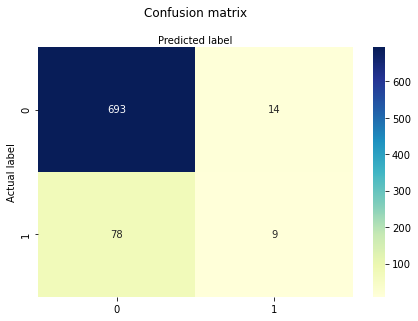

In [114]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [115]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

Accuracy: 0.8841309823677582
Precision: 0.391304347826087
Recall: 0.10344827586206896


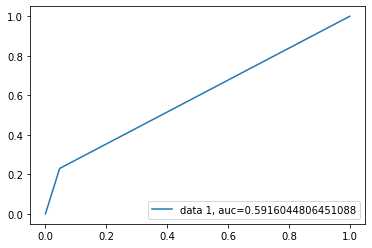

In [116]:
y_pred_proba =  predictionss#exported_pipeline.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()